In [74]:
import pandas as pd

# Load the dataset
df = pd.read_csv("movies_with_summary.csv")

In [75]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop rows with missing values in specific columns
df.dropna(subset=['Summary'], inplace=True)
df.dropna(subset=['Short Summary'], inplace=True)

# Drop duplicates (if needed)
df.drop_duplicates(inplace=True)

df = df[df['Runtime'] > 0]

Missing Values:
Title            0
Year             0
Summary          5
Short Summary    1
Runtime          0
Rating           0
Movie Poster     0
dtype: int64


In [76]:
# Display the cleaned dataset
print("Cleaned Dataset:")
print(df.head())

Cleaned Dataset:
                                               Title  Year  \
0                        Patton Oswalt: Annihilation  2017   
1                                      New York Doll  2005   
2  Mickey's Magical Christmas: Snowed in at the H...  2001   
4                                      And Then I Go  2017   
5                           An Extremely Goofy Movie  2000   

                                             Summary  \
0  Patton Oswald, despite a personal tragedy, pro...   
1  A recovering alcoholic and recently converted ...   
2  After everyone is snowed in at the House of Mo...   
4  In the cruel world of junior high, Edwin suffe...   
5  It's a big time in Max's life. He's college bo...   

                                       Short Summary  Runtime  Rating  \
0  Patton Oswalt, despite a personal tragedy, pro...       66     7.4   
1  A recovering alcoholic and recently converted ...       75     7.9   
2  Mickey and all his friends hold their own Chri...  

In [77]:
import re

# Function to tokenize text using regular expressions
def tokenize(text):
    # Define pattern to match words
    pattern = r'\b\w+\b'

    # Tokenize text using pattern
    tokens = re.findall(pattern, text.lower())

    return tokens

# Apply tokenization to the 'Summary' column
df['tokens'] = df['Summary'].apply(tokenize)

# Display the DataFrame with tokenized text
df['tokens'][0]


['patton',
 'oswald',
 'despite',
 'a',
 'personal',
 'tragedy',
 'produces',
 'his',
 'best',
 'standup',
 'yet',
 'focusing',
 'on',
 'the',
 'tribulations',
 'of',
 'the',
 'trump',
 'era',
 'and',
 'life',
 'after',
 'the',
 'loss',
 'of',
 'a',
 'loved',
 'one',
 'patton',
 'oswald',
 'continues',
 'his',
 'journey',
 'to',
 'contribute',
 'joy',
 'to',
 'the',
 'world']

In [90]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

# Download the NLTK stopwords and POS tagging data
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Define a list of neutral words and proper noun tags
NEUTRAL_WORDS = set(stopwords.words('english'))
PROPER_NOUN_TAGS = {'NNP', 'NNPS'}

# Function to preprocess text and remove neutral words and proper nouns
def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Tag the tokens with parts-of-speech
    tagged_tokens = nltk.pos_tag(tokens)

    # Remove neutral words and proper nouns
    filtered_tokens = [word for word, tag in tagged_tokens if word.lower() not in NEUTRAL_WORDS and tag not in PROPER_NOUN_TAGS]

    # Join the filtered tokens back into a single string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

df['filtered_tokens'] = df['Summary'].apply(preprocess_text)

# Function to calculate sentiment polarity after preprocessing text
def calculate_sentiment_polarity(text):
    # Preprocess the text to remove neutral words and proper nouns
    preprocessed_text = preprocess_text(text)

    # Use TextBlob to calculate sentiment polarity
    blob = TextBlob(preprocessed_text)
    polarity = blob.sentiment.polarity

    return polarity

def classify_sentiment(polarity):
    if polarity == 0:
        return 'neutral'
    elif polarity > 0.5:
        return 'happy'
    else:
        return 'sad'

df['sentiment_polarity_textblob'] = df['filtered_tokens'].apply(calculate_sentiment_polarity)

# Apply sentiment classification to the evaluation movie summaries
df['Predicted_Sentiment_TextBlob'] = df['sentiment_polarity_textblob'].apply(classify_sentiment)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [91]:
df

,Title,Year,Summary,Short Summary,Runtime,Rating,Movie Poster,tokens,filtered_tokens,sentiment_polarity_textblob,Predicted_Sentiment_TextBlob,sentiment_polarity_vader,Predicted_Sentiment_Vader
0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",66,7.4,https://hydramovies.com/wp-content/uploads/201...,"[patton, oswald, despite, a, personal, tragedy...",", despite personal tragedy , produces best sta...",0.625000,happy,0.9339,happy
1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,75,7.9,https://hydramovies.com/wp-content/uploads/201...,"[a, recovering, alcoholic, and, recently, conv...","recovering alcoholic recently converted , `` '...",-0.125000,sad,-0.5106,sad
2,Mickey's Magical Christmas: Snowed in at the H...,2001,After everyone is snowed in at the House of Mo...,Mickey and all his friends hold their own Chri...,65,6.8,https://hydramovies.com/wp-content/uploads/201...,"[after, everyone, is, snowed, in, at, the, hou...","everyone snowed , suggests throw party . Every...",0.650000,happy,0.8352,happy
4,And Then I Go,2017,"In the cruel world of junior high, Edwin suffe...","In the cruel world of junior high, Edwin suffe...",99,7.6,https://hydramovies.com/wp-content/uploads/201...,"[in, the, cruel, world, of, junior, high, edwi...","cruel world junior high , suffers state anxiet...",-0.255000,sad,-0.9403,sad
5,An Extremely Goofy Movie,2000,It's a big time in Max's life. He's college bo...,"Max goes to college, but to his embarassment h...",79,6.4,https://hydramovies.com/wp-content/uploads/201...,"[it, s, a, big, time, in, max, s, life, he, s,...",'s big time 's life . 's college bound friends...,0.137500,sad,0.8316,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,The Cup,2011,"Born into a legendary racing family, jockeys D...","The 2002 Melbourne Cup horse race, brotherly l...",99,5.7,https://hydramovies.com/wp-content/uploads/201...,"[born, into, a, legendary, racing, family, joc...","legendary racing family , jockeys brother , , ...",0.488542,sad,0.9771,happy
3882,Faith in Destiny,2012,A fateful encounter sends a man on a journey t...,A fateful encounter sends a man on a journey t...,84,6.2,https://hydramovies.com/wp-content/uploads/201...,"[a, fateful, encounter, sends, a, man, on, a, ...",fateful encounter sends man journey makes ques...,0.000000,neutral,0.0000,neutral
3883,The Eye of the Storm,2011,"In the dead geographic center of American, a c...",Elizabeth Hunter controls all in her life - so...,114,6.3,https://hydramovies.com/wp-content/uploads/201...,"[in, the, dead, geographic, center, of, americ...","dead geographic center , college student ( - S...",-0.133333,sad,-0.9349,sad
3884,Smitty,2012,Thirteen year-old city brat Ben (Brandon Tyler...,Thirteen year-old city brat Ben (Brandon Tyler...,94,5.2,https://hydramovies.com/wp-content/uploads/201...,"[thirteen, year, old, city, brat, ben, brandon...","Thirteen year-old city brat ( ) done , struggl...",0.138265,sad,0.8934,happy


In [92]:
h = 0
s = 0
n = 0

for sentiment in df['Predicted_Sentiment_TextBlob']:
    if sentiment == 'happy':
        h += 1
    elif sentiment == 'sad':
        s += 1
    else:
        n += 1

print(h, s, n)



36 3402 255


In [93]:
h = 0
s = 0
n = 0

for sentiment in df['Predicted_Sentiment_Vader']:
    if sentiment == 'happy':
        h += 1
    elif sentiment == 'sad':
        s += 1
    else:
        n += 1

print(h, s, n)

1221 2355 117


Vader pretrained model:

In [88]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the NLTK stopwords data
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a list of neutral words
NEUTRAL_WORDS = set(stopwords.words('english'))

# Function to preprocess text and remove neutral words and proper nouns
def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove neutral words
    filtered_tokens = [word for word in tokens if word.lower() not in NEUTRAL_WORDS]

    # Join the filtered tokens back into a single string
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

# Function to calculate sentiment polarity after preprocessing text
def calculate_sentiment_polarity(text):
    # Preprocess the text to remove neutral words
    preprocessed_text = preprocess_text(text)

    # Use VADER to calculate sentiment polarity
    polarity_scores = sia.polarity_scores(preprocessed_text)

    return polarity_scores['compound']

def classify_sentiment(polarity):
    if polarity == 0:
        return 'neutral'
    elif polarity > 0.5:
        return 'happy'
    else:
        return 'sad'

df['sentiment_polarity_vader'] = df['Summary'].apply(calculate_sentiment_polarity)

# Apply sentiment classification to the evaluation movie summaries
df['Predicted_Sentiment_Vader'] = df['sentiment_polarity_vader'].apply(classify_sentiment)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [89]:
df

,Title,Year,Summary,Short Summary,Runtime,Rating,Movie Poster,tokens,filtered_tokens,sentiment_polarity_textblob,Predicted_Sentiment_TextBlob,sentiment_polarity_vader,Predicted_Sentiment_Vader
0,Patton Oswalt: Annihilation,2017,"Patton Oswald, despite a personal tragedy, pro...","Patton Oswalt, despite a personal tragedy, pro...",66,7.4,https://hydramovies.com/wp-content/uploads/201...,"[patton, oswald, despite, a, personal, tragedy...",", despite personal tragedy , produces best sta...",0.625000,happy,0.9339,happy
1,New York Doll,2005,A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...,75,7.9,https://hydramovies.com/wp-content/uploads/201...,"[a, recovering, alcoholic, and, recently, conv...","recovering alcoholic recently converted , `` '...",-0.125000,sad,-0.5106,sad
2,Mickey's Magical Christmas: Snowed in at the H...,2001,After everyone is snowed in at the House of Mo...,Mickey and all his friends hold their own Chri...,65,6.8,https://hydramovies.com/wp-content/uploads/201...,"[after, everyone, is, snowed, in, at, the, hou...","everyone snowed , suggests throw party . Every...",0.650000,happy,0.8352,happy
4,And Then I Go,2017,"In the cruel world of junior high, Edwin suffe...","In the cruel world of junior high, Edwin suffe...",99,7.6,https://hydramovies.com/wp-content/uploads/201...,"[in, the, cruel, world, of, junior, high, edwi...","cruel world junior high , suffers state anxiet...",-0.255000,sad,-0.9403,sad
5,An Extremely Goofy Movie,2000,It's a big time in Max's life. He's college bo...,"Max goes to college, but to his embarassment h...",79,6.4,https://hydramovies.com/wp-content/uploads/201...,"[it, s, a, big, time, in, max, s, life, he, s,...",'s big time 's life . 's college bound friends...,0.137500,happy,0.8316,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,The Cup,2011,"Born into a legendary racing family, jockeys D...","The 2002 Melbourne Cup horse race, brotherly l...",99,5.7,https://hydramovies.com/wp-content/uploads/201...,"[born, into, a, legendary, racing, family, joc...","legendary racing family , jockeys brother , , ...",0.488542,happy,0.9771,happy
3882,Faith in Destiny,2012,A fateful encounter sends a man on a journey t...,A fateful encounter sends a man on a journey t...,84,6.2,https://hydramovies.com/wp-content/uploads/201...,"[a, fateful, encounter, sends, a, man, on, a, ...",fateful encounter sends man journey makes ques...,0.000000,neutral,0.0000,neutral
3883,The Eye of the Storm,2011,"In the dead geographic center of American, a c...",Elizabeth Hunter controls all in her life - so...,114,6.3,https://hydramovies.com/wp-content/uploads/201...,"[in, the, dead, geographic, center, of, americ...","dead geographic center , college student ( - S...",-0.133333,sad,-0.9349,sad
3884,Smitty,2012,Thirteen year-old city brat Ben (Brandon Tyler...,Thirteen year-old city brat Ben (Brandon Tyler...,94,5.2,https://hydramovies.com/wp-content/uploads/201...,"[thirteen, year, old, city, brat, ben, brandon...","Thirteen year-old city brat ( ) done , struggl...",0.138265,happy,0.8934,happy


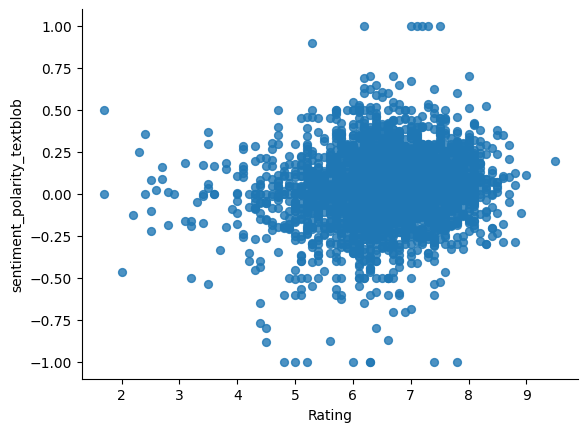

In [96]:
# @title Rating vs sentiment_polarity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Rating', y='sentiment_polarity_textblob', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

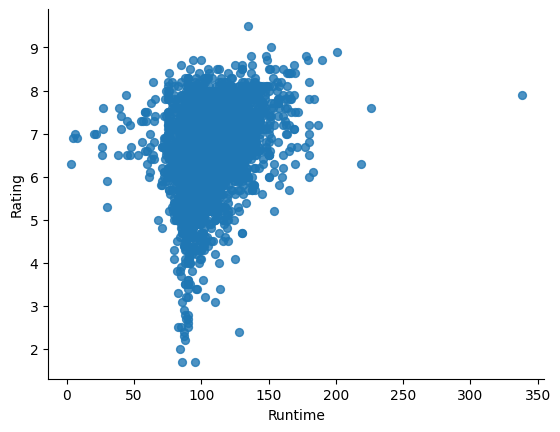

In [97]:
# @title Runtime vs Rating

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Runtime', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [98]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("sbcBI/sentiment_analysis")
model = AutoModelForSequenceClassification.from_pretrained("sbcBI/sentiment_analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import torch

# Iterate through each movie summary
for index, row in df.iterrows():
    summary = row['Summary']

    # Tokenize the summary
    inputs = tokenizer(summary, return_tensors="pt", padding=True, truncation=True)

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted sentiment
    predicted_class = torch.argmax(outputs.logits, dim=1).item()

    # Map predicted class to sentiment label
    sentiment_label = {0: 'happy', 1: 'sad', 2: 'neutral'}[predicted_class]

    # Update dataframe with sentiment label
    df.at[index, 'sentiment'] = sentiment_label


In [ ]:
# import pandas as pd
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm

# # Convert sentiment labels to numerical labels
# label_map = {"happy": 0, "sad": 1, "neutral": 2}
# df['Numerical_Label'] = df['sentiment'].map(label_map)

# # Split the dataset into training and validation sets
# train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# # Load BERT tokenizer and convert summaries to input IDs
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# train_input_ids = tokenizer(train_df['Summary'].tolist(), padding=True, truncation=True, return_tensors="pt")
# val_input_ids = tokenizer(val_df['Summary'].tolist(), padding=True, truncation=True, return_tensors="pt")

# # Reduce batch size
# batch_size = 16

# # Create DataLoader for training and validation sets with reduced batch size
# train_data = TensorDataset(train_input_ids.input_ids, torch.tensor(train_df['Numerical_Label'].tolist()))
# train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# val_data = TensorDataset(val_input_ids.input_ids, torch.tensor(val_df['Numerical_Label'].tolist()))
# val_dataloader = DataLoader(val_data, batch_size=batch_size)

# # Load pre-trained BERT model for sequence classification
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Update num_labels to 3

# # Fine-tune the BERT model
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# optimizer = AdamW(model.parameters(), lr=2e-5)
# epochs = 3

# for epoch in range(epochs):
#     model.train()
#     total_loss = 0
#     for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}', unit='batches'):
#         batch = tuple(t.to(device) for t in batch)
#         inputs, labels = batch
#         optimizer.zero_grad()
#         outputs = model(inputs, labels=labels)
#         loss = outputs.loss
#         total_loss += loss.item()
#         loss.backward()
#         optimizer.step()

#     avg_train_loss = total_loss / len(train_dataloader)

#     # Evaluate the model on the validation set
#     model.eval()
#     val_loss = 0
#     with torch.no_grad():
#         for batch in val_dataloader:
#             batch = tuple(t.to(device) for t in batch)
#             inputs, labels = batch
#             outputs = model(inputs, labels=labels)
#             loss = outputs.loss
#             val_loss += loss.item()

#     avg_val_loss = val_loss / len(val_dataloader)
#     print(f"Epoch {epoch + 1}: Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

# # Perform inference using the fine-tuned model
# # Your code for inference goes here
